# Step 3. Parameterisation

Up to this point of the pipeline, a sentence is still represented as a string diagram, independent of any low-level decisions such as tensor dimensions or specific quantum gate choices. This abstract form can be turned into a concrete quantum circuit or tensor network by applying ansätze. An *ansatz* can be seen as a map that determines choices such as the number of qubits that every wire of the string diagram is associated with and the concrete parameterised quantum states that correspond to each word. In `lambeq`, ansätze can be added by extending one of the classes [TensorAnsatz](../lambeq.rst#lambeq.tensor.TensorAnsatz) or [CircuitAnsatz](../lambeq.rst#lambeq.circuit.CircuitAnsatz) depending on the type of the experiment.

## Quantum case

For the quantum case, the library comes equipped with the class [IQPAnsatz](../lambeq.rst#lambeq.circuit.IQPAnsatz), which turns the string diagram into a standard IQP circuit.

In [1]:
from lambeq.ccg2discocat import DepCCGParser

sentence = 'John walks in the park'

# Get a string diagram
depccg_parser = DepCCGParser()
diagram = depccg_parser.sentence2diagram(sentence)

In order to create an [IQPAnsatz](../lambeq.rst#lambeq.circuit.IQPAnsatz) instance, we need to define the number of qubits for all atomic types that occur in the diagram -- in this case, for the noun type and the sentence type. The following code produces a circuit by assigning 1 qubit to the noun type and 1 qubit to the sentence type. Further, the number of IQP layers (`n_layers`) is set to 1.

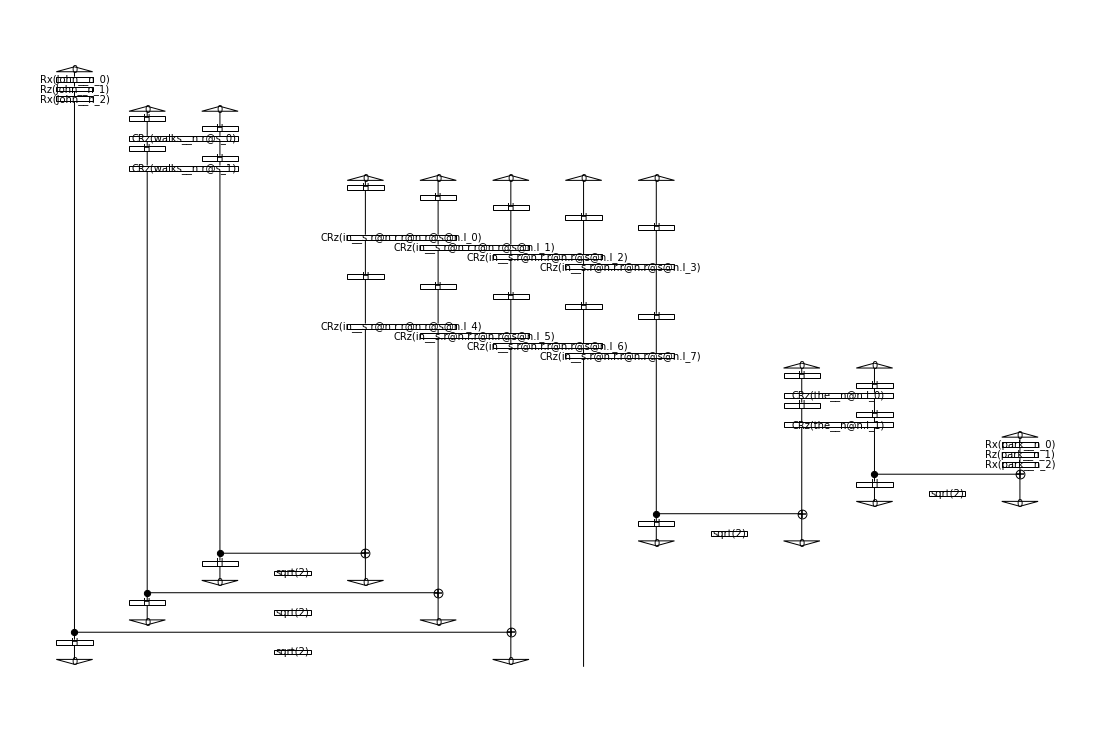

In [2]:
from lambeq.circuit import IQPAnsatz
from lambeq.core.types import AtomicType

# Define atomic types
N = AtomicType.NOUN
S = AtomicType.SENTENCE

# Convert string diagram to quantum circuit
ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize=(15,10))

This produces a quantum circuit in `discopy` form. Conversion to `pytket` format is very simple:

In [3]:
from pytket.circuit.display import render_circuit_jupyter

tket_circuit = discopy_circuit.to_tk()

# This does not render properly on GitHub, please view it at:
# https://cqcl.github.io/lambeq/examples/tutorial_1-3.ipynb
render_circuit_jupyter(tket_circuit)

Exporting to `pytket` format provides additional functionality and allows interoperability. For example, obtaining a `qiskit` circuit is trivial:

In [4]:
from pytket.extensions.qiskit import tk_to_qiskit

qiskit_circuit = tk_to_qiskit(tket_circuit)

## Classical case

In the case of a classical experiment, instantiating one of the tensor ansätze requires the user to assign dimensions to each one of the atomic types occurring in the diagram. In the following code, we parameterise a [TensorAnsatz](../lambeq.rst#lambeq.tensor.TensorAnsatz) instance with $d_n=4$ for the base dimension of the noun space, and $d_s=2$ as the dimension of the sentence space:

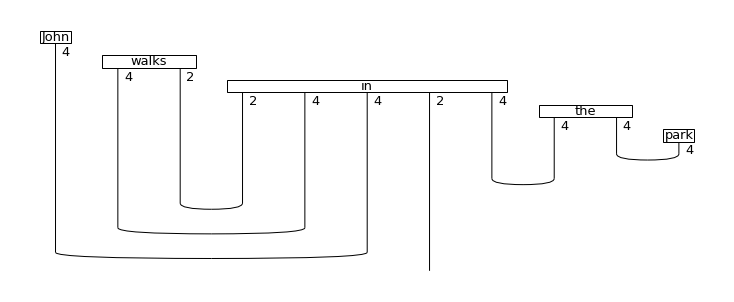

In [5]:
from lambeq.tensor import TensorAnsatz
from discopy import Dim

tensor_ansatz = TensorAnsatz({N: Dim(4), S: Dim(2)})
tensor_diagram = tensor_ansatz(diagram)

tensor_diagram.draw(figsize=(10,4), fontsize=13)

Note that the wires of the diagram are now annotated with the dimensions corresponding to each type, indicating that the result is a concrete tensor network.

### Matrix product states

In classical experiments of this kind, the tensors associated with certain words, such as conjunctions, can become extremely large. In some cases, the order of these tensors can be 12 or even higher ($d^{12}$ elements, where $d$ is the base dimension), which makes efficient execution of the experiment impossible. In order to address this problem, `lambeq` includes ansätze for converting tensors into various forms of *matrix product states* (MPSs).

The following code applies the [SpiderAnsatz](../lambeq.rst#lambeq.tensor.SpiderAnsatz) class, which splits tensors with order greater than 2 to sequences of order-2 tensors (i.e. matrices), connected with spiders.

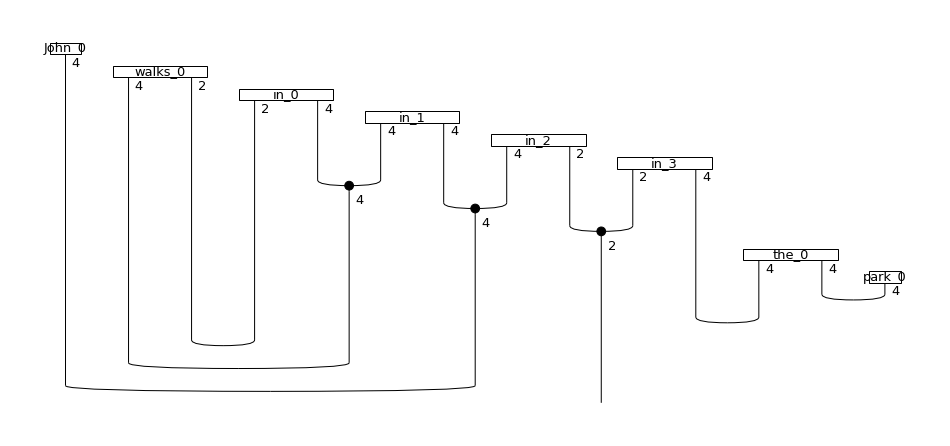

In [6]:
from lambeq.tensor import SpiderAnsatz
from discopy import Dim

spider_ansatz = SpiderAnsatz({N: Dim(4), S: Dim(2)})
spider_diagram = spider_ansatz(diagram)
spider_diagram.draw(figsize=(13,6), fontsize=13)

Note that the preposition "in" is now represented by a matrix product state of 4 linked matrices, which is a very substantial reduction in the space required to store the tensors.

Another option is the [MPSAnsatz](../lambeq.rst#lambeq.tensor.MPSAnsatz) class, which converts large tensors to sequences of order-3 tensors connected with cups. In this setting, the user needs to also define the *bond dimension*, that is, the dimensionality of the wire that connects the tensors together.

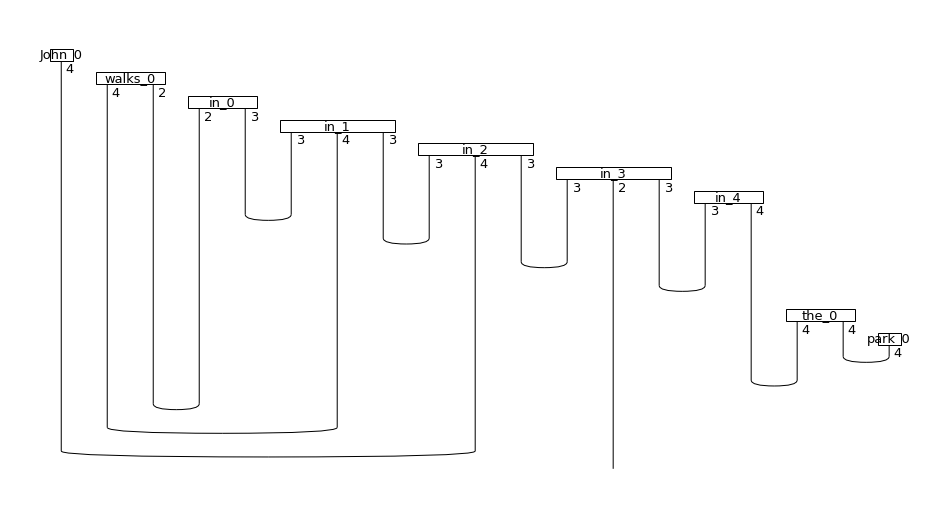

In [7]:
from lambeq.tensor import MPSAnsatz
from discopy import Dim

mps_ansatz = MPSAnsatz({N: Dim(4), S: Dim(2)}, bond_dim=3)
mps_diagram = mps_ansatz(diagram)
mps_diagram.draw(figsize=(13,7), fontsize=13)

**See also:**

- [tensor.ipynb](../examples/tensor.ipynb)
- [circuit.ipynb](../examples/circuit.ipynb)